In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.86609806, -0.58137544, -0.84326825,  1.15680131,  0.95507083,
         0.05200356, -0.0980797 , -0.25484965, -1.05136482, -1.56617563],
       [ 0.87242876, -0.17189248,  0.41681926, -0.91586123, -0.94886556,
         1.44175759,  1.74208598,  0.25010329, -0.94256479, -0.33985129]])

In [4]:
test_Features[:2]

array([[-0.9018881 , -0.54819033, -0.98842695,  1.51838218,  1.33151452,
         0.03023326, -0.18496414, -0.31040763,  0.58886841, -1.70425839],
       [ 0.10615555, -0.58942098,  0.5420874 , -0.53786972, -0.6176675 ,
         0.48511418,  0.49520707,  0.2889377 , -0.08985605, -0.86622749]])

In [5]:
train_Label[:4]

array([1, 1, 0, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=10*3,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=10*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=10,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(10, activation='tanh'))

In [18]:
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 30)            60        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 30)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 20)            620       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 20)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 10)            210       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 10)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
__________

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 5s 526us/step - loss: 0.6368 - acc: 0.6666 - val_loss: 0.5810 - val_acc: 0.7015
Epoch 2/30
10194/10194 [==============================] - 1s 138us/step - loss: 0.5381 - acc: 0.7393 - val_loss: 0.4923 - val_acc: 0.7701
Epoch 3/30
10194/10194 [==============================] - 0s 43us/step - loss: 0.4627 - acc: 0.7920 - val_loss: 0.4305 - val_acc: 0.8152
Epoch 4/30
10194/10194 [==============================] - 1s 51us/step - loss: 0.4140 - acc: 0.8254 - val_loss: 0.3976 - val_acc: 0.8309
Epoch 5/30
10194/10194 [==============================] - 1s 140us/step - loss: 0.3883 - acc: 0.8354 - val_loss: 0.3811 - val_acc: 0.8384
Epoch 6/30
10194/10194 [==============================] - 2s 154us/step - loss: 0.3758 - acc: 0.8417 - val_loss: 0.3666 - val_acc: 0.8419
Epoch 7/30
10194/10194 [==============================] - 1s 104us/step - loss: 0.3665 - acc: 0.8438 - val_loss: 0.3596 - val

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

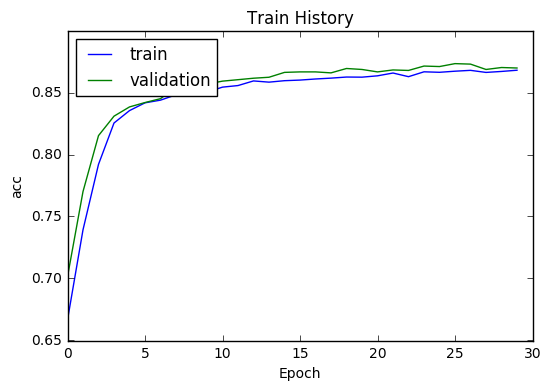

In [23]:
show_train_history(train_history,'acc','val_acc')

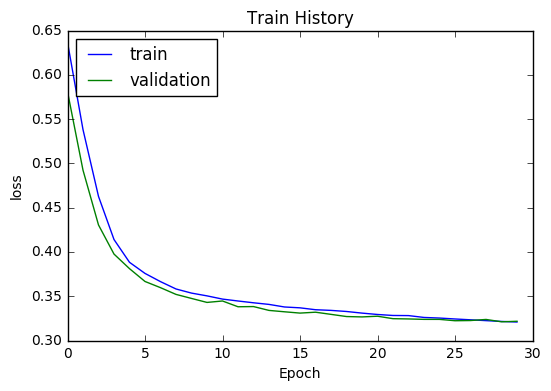

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 148us/step


In [26]:
scores[1]

0.8685677871594711